In [1]:
## FIRE simulator

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as dt
from sympy import Symbol, solveset, Interval

# 시각화 관련
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
## cf.getThemes()
cf.set_config_file(theme='polar')
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,6)


## 퀀트함수 ## 절대경로 참조
import sys, os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
from quant_functions import anal_funcs, data_funcs

## Func

In [3]:
def cal_kap(s, c, r, t):
    '''
    * s: seed, c: cashflow, r: return(Y), t: terms(Y)
    * k: 달성자산
    '''
    k = s*((1+r)**t) + c*((1-((1+r)**t)))/(1-(1+r))
    return(k)

In [4]:
def cal_ret(k, s, c, t):
    '''
    * k: 목표 자산, s: 시드 머니, c: 현금 흐름, t: 투자 기간
    * r: 목표수익률
    '''
    r=Symbol('r')
    equation = s*((1+r)**(t)) + c*((1-((1+r)**(t)))/(1-(1+r))) - k
    val = solveset(equation, r, Interval(0, 999))
    solve_r = float(list(val)[0])
    return(np.round(solve_r, 2))

In [5]:
def cal_term(k, s, c, r):
    '''
    * k: kapital, s: seed, c: cashflow, r: return(Y)
    * t: 요구 기간
    '''
    t=Symbol('t')
    equation = s*((1+r)**(t)) + c*((1-((1+r)**(t)))/(1-(1+r))) - k
    val = solveset(equation, t, Interval(0, 999))
    solve_t = float(list(val)[0])
    return(np.round(solve_t, 2))

In [9]:
x_ls = []
y_ls = []
for i in range(1, 11):
    x_ls.append(50*i)
    y_ls.append(cal_term(50000, 0, 50*i*12, 0.1))
res = pd.DataFrame([x_ls, y_ls], index=['월투자금', '달성기간']).T

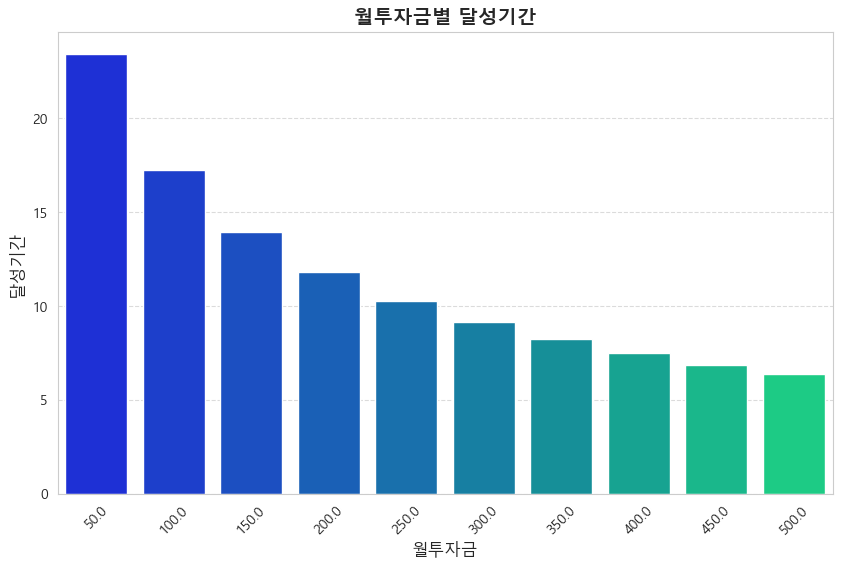

In [11]:
# 막대 그래프 그리기
sns.barplot(data=res, x='월투자금', y='달성기간', palette='winter')

# 그래프 제목 및 레이블
plt.title('월투자금별 달성기간', fontsize=14, fontweight='bold')
plt.xlabel('월투자금', fontsize=12)
plt.ylabel('달성기간', fontsize=12)

# x축 눈금 45도 회전 (필요 시)
plt.xticks(rotation=45)

# 격자 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

In [6]:
def investment_growth(initial_investment, monthly_contribution, annual_return, years):
    monthly_return = (1 + annual_return) ** (1/12) - 1
    months = years * 12
    asset_values = []
    principal_invested = []
    earnings = []
    current_value = initial_investment
    total_principal = initial_investment

    for _ in range(1, months + 1):
        current_value = current_value * (1 + monthly_return) + monthly_contribution
        total_principal += monthly_contribution
        asset_values.append(current_value)
        principal_invested.append(total_principal)
        earnings.append(current_value - total_principal)

    df = pd.DataFrame({
        'Month': range(1, months + 1),
        'Asset Value': asset_values,
        'Principal Invested': principal_invested,
        'Earnings': earnings
    })

    return df

## Proc

In [7]:
## seed
s = 0 * 1e4
## Kapital
k = 70000 *1e4
## term
d = (dt.datetime(2025, 1, 1) - dt.datetime(2014, 12, 31)).days
t = int(d/365) ## 연으로 변환
## cash flow
c = 300*1e4*12

In [8]:
seed1_worst = cal_kap(10000*1e4, 200*1e4*12, 0.08, 10)/1e4

In [9]:
seed1_best = cal_kap(10000*1e4, 200*1e4*12, 0.12, 10)/1e4

In [10]:
seed0_worst = cal_kap(0, c, 0.08, 10)/1e4

In [11]:
seed0_best = cal_kap(0, c, 0.12, 10)/1e4

In [12]:
print(seed0_worst, seed0_best)

52151.624877275426 63175.4462503263


In [13]:
print(32000*(0.035*0.85)//4)
print(40000*(0.035*0.85)//4)
print(seed1_worst*(0.035*0.85)//12)
print(seed1_best*(0.035*0.85)//12)

238.0
297.0
139.0
181.0


In [14]:
demanded_return = cal_ret(k, s, c, t)

In [15]:
# ## seed
# s = 34000 * 1e4
# ## Kapital
# k = 150000 *1e4
# ## term
# d = (dt.datetime(2028, 5, 31) - dt.datetime.now()).days
# t = int(d/365) ## 연으로 변환
# ## return
# r = 0.43
# ## cash flow
# c = 120*1e4*12

In [111]:
demanded_term = cal_term(k, s, c, r)
demanded_return = cal_ret(k, s, c, t)
expected_kapital = cal_kap(s, c, r, t)

In [116]:
print(f"기간의 충분성: {demanded_term <= t}, 요구기간: {demanded_term}Y, 가용기간: {t}Y")
print(f"수익률의 충분성: {demanded_return <= r}, 요구수익률: {demanded_return*1e2}%, 가용수익률: {r*1e2}%")
print(f"자산의 적절성: {expected_kapital >= k}, 기대자산: {expected_kapital/1e4:.0f}, 목표자산: {k/1e4:.0f}")

기간의 충분성: True, 요구기간: 4.26Y, 가용기간: 5Y
수익률의 충분성: True, 요구수익률: 26.0%, 가용수익률: 43.0%
자산의 적절성: True, 기대자산: 41691, 목표자산: 30000


In [24]:
# Example usage
initial_investment = 0
monthly_contribution = 300
annual_return = 0.15
years = 10

In [25]:
df_asset_growth = investment_growth(initial_investment, monthly_contribution, annual_return, years)
df_asset_growth['diversification'] = (monthly_contribution/df_asset_growth['Asset Value']) * 100

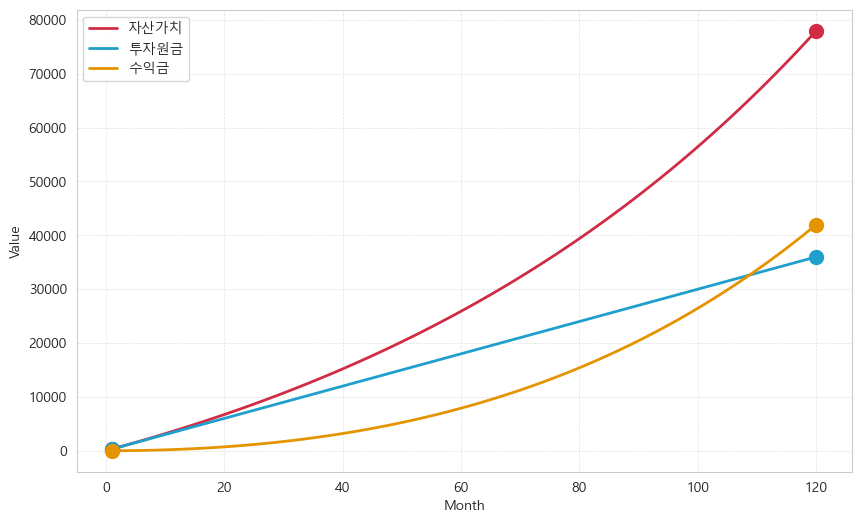

In [26]:
df_asset_growth.columns = ['Month', '자산가치', '투자원금', '수익금', '시분할효과']
df_asset_growth.set_index('Month')[['자산가치', '투자원금', '수익금']].plot()


plt.gca().lines[0].set_color('#D12C45')
plt.gca().lines[0].set_linewidth(2)
plt.gca().lines[1].set_color('#1E9FCC')
plt.gca().lines[1].set_linewidth(2)
plt.gca().lines[2].set_color('#E59400')
plt.gca().lines[2].set_linewidth(2)
plt.legend(['자산가치', '투자원금', '수익금'], loc='upper left', frameon=True)

legend = plt.gca().get_legend()
legend.legendHandles[0].set_color('#D12C45')
legend.legendHandles[1].set_color('#1E9FCC')
legend.legendHandles[2].set_color('#E59400')

plt.xlabel('Month')
plt.ylabel('Value')
## plt.title('적립식 투자 시뮬레이션', fontsize=22, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color="#E0E0E0")  # 그리드 추가 및 스타일 설정

# 각 그래프의 시작점과 끝점에 포인트를 둥글게 찍기
plt.scatter([1, len(df_asset_growth)], [df_asset_growth['자산가치'].iloc[0], df_asset_growth['자산가치'].iloc[-1]], color='#D12C45', s=100, zorder=5)
plt.scatter([1, len(df_asset_growth)], [df_asset_growth['투자원금'].iloc[0], df_asset_growth['투자원금'].iloc[-1]], color='#1E9FCC', s=100, zorder=5)
plt.scatter([1, len(df_asset_growth)], [df_asset_growth['수익금'].iloc[0], df_asset_growth['수익금'].iloc[-1]], color='#E59400', s=100, zorder=5)

KeyError: "None of [Index(['자산가치', '투자원금', '수익금'], dtype='object')] are in the [columns]"

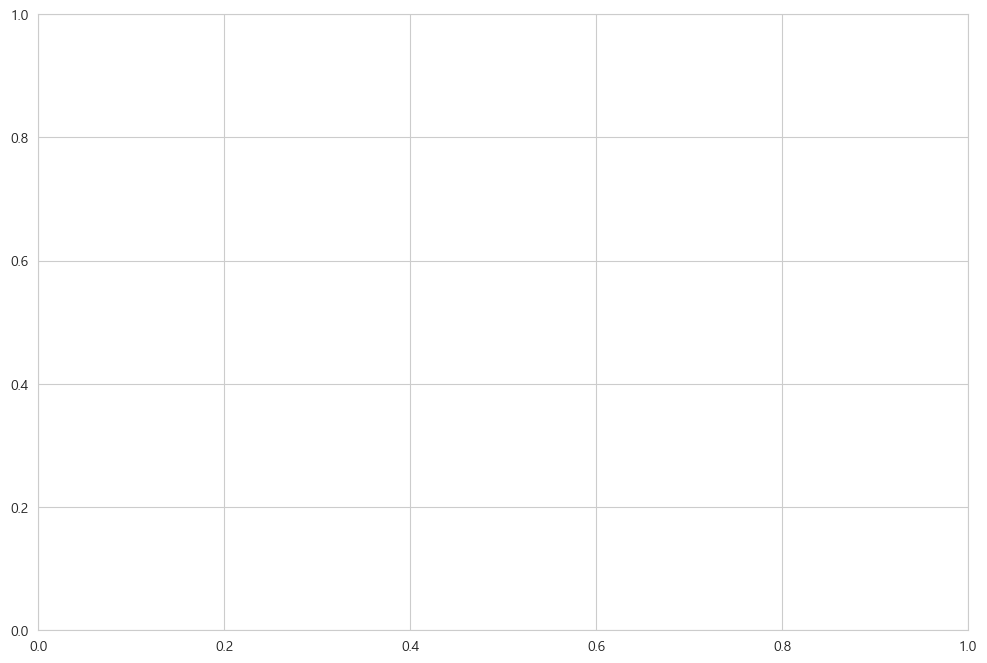

In [ ]:
# 시분할 효과 그래프 추가
fig, ax1 = plt.subplots(figsize=(12, 8))

# 기존 자산 가치, 투자 원금, 수익금 그래프
df_asset_growth.set_index('Month')[['자산가치', '투자원금', '수익금']].plot(ax=ax1, linewidth=2, color=['#D12C45', '#1E9FCC', '#E59400'], alpha=0.4)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Value', fontsize=14)
ax1.set_title('적립식 투자 시뮬레이션', fontsize=22, fontweight='bold')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color="#E0E0E0")

# 시분할 효과 그래프 (오른쪽 축 사용)
ax2 = ax1.twinx()
ax2.plot(df_asset_growth['Month'], df_asset_growth['시분할효과'], color='#8E001C', linewidth=2, linestyle='--', label='시분할 효과')
ax2.set_ylabel('시분할 효과 (%)', fontsize=14)
ax2.legend(loc='upper left', frameon=False)

# 전체 스타일링 및 마무리
ax1.legend(['자산가치', '투자원금', '수익금'], loc='upper right', frameon=False)

plt.show()

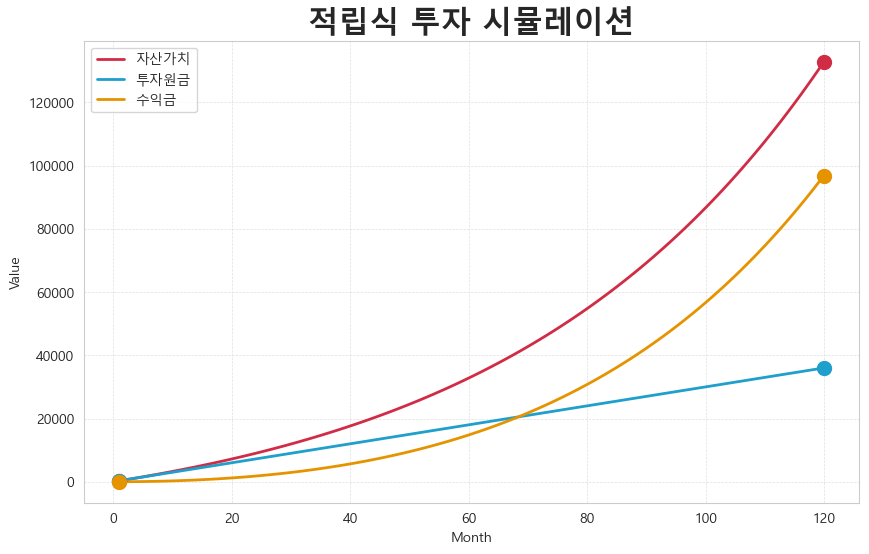

In [157]:





plt.show()

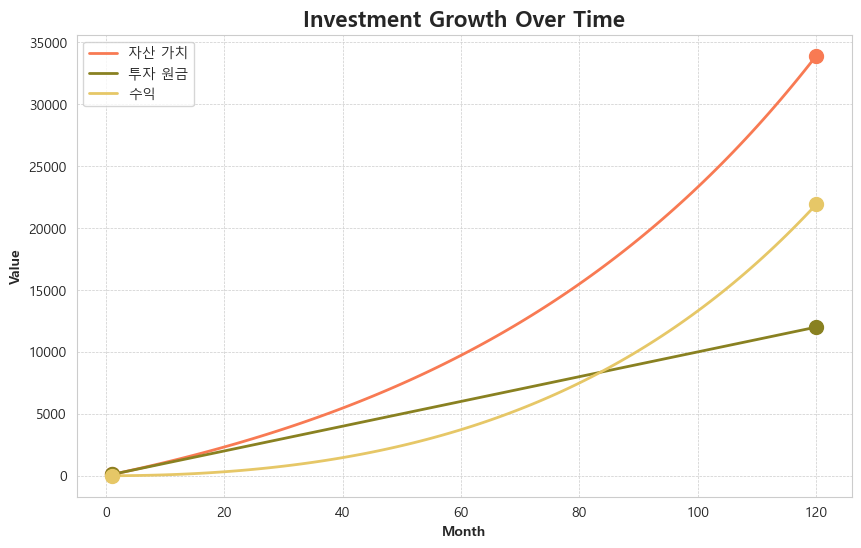

In [44]:
temp_ls = []
for n in range(1, 2000):
    r = n*0.001
    gap = np.e**r - (1+r)
    temp_ls.append((r, gap))

In [46]:
temp_df = pd.DataFrame(temp_ls, columns=['r', 'gap'])

In [53]:
np.e

2.718281828459045

<AxesSubplot:xlabel='r', ylabel='gap'>

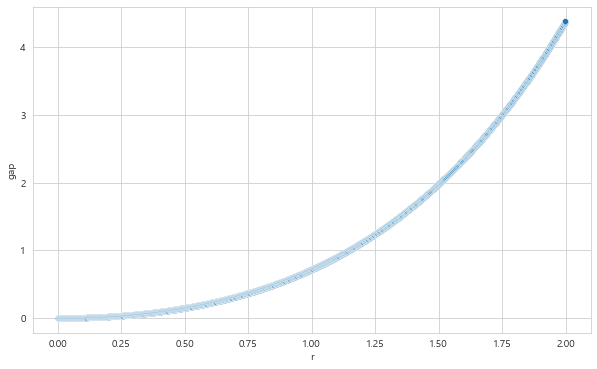

In [141]:
sns.scatterplot(data = temp_df, x = 'r', y = 'gap')